#### Sr. Engineer: Dhruv Singh <br> Course Name: EDHEC Portfolio Optimization <br> Lesson Name: Volatility and Risk <br> Date Updated: 01/09/2022

# Volatility and Risk

In [1]:
import pandas as pd
prices = pd.read_csv("data/etf_data.csv")
prices = prices.set_index('Date')
returns = prices.pct_change()
returns

,QQQ,IWF,VOO,SPY
Date,,,,
10/1/2010,NaN,NaN,NaN,NaN
11/1/2010,-0.001725,0.011319,-0.001108,0.000000
12/1/2010,0.045498,0.050642,0.064337,0.061271
1/1/2011,0.028278,0.024275,0.022234,0.023300
2/1/2011,0.031607,0.034271,0.034664,0.034737
...,...,...,...,...
8/1/2021,0.042187,0.036485,0.029518,0.029760
9/1/2021,-0.057876,-0.057958,-0.049753,-0.049650
10/1/2021,0.078640,0.087432,0.070385,0.070164


In [2]:
# dropping first row
returns = returns.dropna()
returns

,QQQ,IWF,VOO,SPY
Date,,,,
11/1/2010,-0.001725,0.011319,-0.001108,0.000000
12/1/2010,0.045498,0.050642,0.064337,0.061271
1/1/2011,0.028278,0.024275,0.022234,0.023300
2/1/2011,0.031607,0.034271,0.034664,0.034737
3/1/2011,-0.005885,-0.003132,-0.004434,-0.004206
...,...,...,...,...
8/1/2021,0.042187,0.036485,0.029518,0.029760
9/1/2021,-0.057876,-0.057958,-0.049753,-0.049650
10/1/2021,0.078640,0.087432,0.070385,0.070164


In [3]:
# standard deviation manually
deviations = returns - returns.mean()
squared_deviations = deviations**2
mean_squared_deviations = squared_deviations.mean()

import numpy as np

volatility = np.sqrt(mean_squared_deviations)
volatility

QQQ    0.044111
IWF    0.040775
VOO    0.038577
SPY    0.038601
dtype: float64

In [4]:
# using function
returns.std() # slight difference, based on method

QQQ    0.044277
IWF    0.040928
VOO    0.038722
SPY    0.038746
dtype: float64

In [5]:
returns.shape

(134, 4)

Just as we can with a list, we can access the elements of a tuple using an index, starting at 0. Therefore, to get the number of rows in the DataFrame, we extract the 0th element of the tuple.

In [6]:
# more accurate manual calculation of standard deviation
number_of_obs = returns.shape[0]
mean_squared_deviations = squared_deviations.sum()/(number_of_obs-1)
volatility = np.sqrt(mean_squared_deviations)
volatility

QQQ    0.044277
IWF    0.040928
VOO    0.038722
SPY    0.038746
dtype: float64

In [7]:
# re-computing using function
returns.std()

QQQ    0.044277
IWF    0.040928
VOO    0.038722
SPY    0.038746
dtype: float64

# Annualizing Volatility

In [ ]:
# to annualize volatility of monthly series, muiltiply by square root of 12
annualized_vol = returns.std()*(12**0.5)
annualized_vol

# Risk Adjusted Returns

In [8]:
# re-reading in data
me_m = pd.read_csv("data/etf_data.csv",
                   header=0, index_col=0, parse_dates=True, na_values=-99.99)
me_m.head()

,QQQ,IWF,VOO,SPY
Date,,,,
2010-10-01,52.180000,53.889999,108.300003,118.489998
2010-11-01,52.090000,54.500000,108.180000,118.489998
2010-12-01,54.459999,57.259998,115.139999,125.750000
2011-01-01,56.000000,58.650002,117.699997,128.679993
2011-02-01,57.770000,60.660000,121.779999,133.149994


In [10]:
cols = ['SPY', 'QQQ']
returns = me_m[cols].pct_change()
returns = returns.dropna()
returns.head()

,SPY,QQQ
Date,,
2010-11-01,0.000000,-0.001725
2010-12-01,0.061271,0.045498
2011-01-01,0.023300,0.028278
2011-02-01,0.034737,0.031607
2011-03-01,-0.004206,-0.005885


<AxesSubplot:xlabel='Date'>

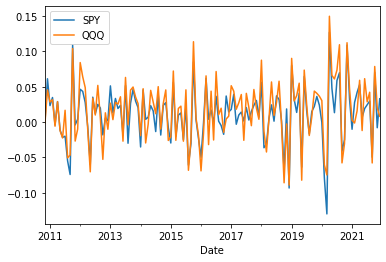

In [11]:
returns.plot()

In [14]:
# renaming columns
returns.columns = ['SPY', 'QQQ']

<AxesSubplot:xlabel='Date'>

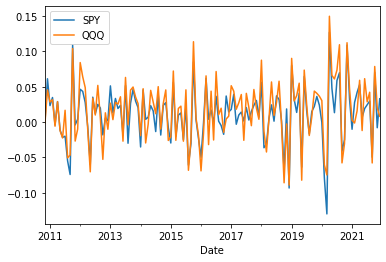

In [15]:
returns.plot()

In [16]:
# annualizing volatility
annualized_vol = returns.std()*np.sqrt(12)
annualized_vol

SPY    0.134219
QQQ    0.153379
dtype: float64

### Computing Annualized Returns

In [17]:
n_months = returns.shape[0]
return_per_month = (returns+1).prod()**(1/n_months) - 1
return_per_month

SPY    0.010346
QQQ    0.015260
dtype: float64

In [18]:
annualized_return = (return_per_month + 1)**12-1

In [19]:
annualized_return = (returns+1).prod()**(12/n_months) - 1
annualized_return

SPY    0.131460
QQQ    0.199295
dtype: float64

In [20]:
annualized_return/annualized_vol

SPY    0.979443
QQQ    1.299362
dtype: float64

In [21]:
riskfree_rate = 0.03 # may need to update this
excess_return = annualized_return - riskfree_rate
sharpe_ratio = excess_return/annualized_vol
sharpe_ratio

SPY    0.755928
QQQ    1.103769
dtype: float64